In [1]:
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter
#import pandas_profiling as pp
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
from mlxtend.classifier import StackingCVClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [2]:
#link to the dataset"https://ieee-dataport.org/open-access/heart-disease-dataset-comprehensive"
data1 = pd.read_csv("heart.csv")
data1['chest pain type'] = data1['chest pain type'] - 1

data2 = pd.read_csv("dataset.csv").sample(frac=1)
data1.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,2.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,2.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,3.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,3.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [3]:
data2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [18]:
To analyze this dataset, we'll take a look at each column's statistical summary to understand its distribution, range, and other key characteristics. Here's a step-by-step breakdown of the data:

1. Data Overview
The dataset contains 1,220 observations (rows) with 12 features (columns) related to heart disease. Here are the columns:

age: Age of the patient.
sex: Gender of the patient (0 = female, 1 = male).
cp: Chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic).
trestbps: Resting blood pressure (in mm Hg).
chol: Serum cholesterol (in mg/dl).
fbs: Fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false).
restecg: Resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy).
thalach: Maximum heart rate achieved.
exang: Exercise induced angina (1 = yes; 0 = no).
oldpeak: ST depression induced by exercise relative to rest.
slope: The slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping).
target: Diagnosis of heart disease (1 = disease, 0 = no disease).
2. Statistical Summary
Feature	Count	Mean	Std	Min	25%	50%	75%	Max
age	1220	53.74	9.34	28.00	47.00	54.00	60.00	77.00
sex	1220	0.76	0.43	0.00	1.00	1.00	1.00	1.00
cp	1220	1.93	1.11	0.00	1.00	2.00	3.00	3.00
trestbps	1220	132.20	18.28	0.00	120.00	130.00	140.00	200.00
chol	1220	210.61	100.43	0.00	188.00	228.00	269.00	603.00
fbs	1220	0.21	0.41	0.00	0.00	0.00	0.00	1.00
restecg	1220	0.58	0.75	0.00	0.00	0.00	1.00	2.00
thalach	1220	139.97	25.45	60.00	122.00	141.00	160.00	202.00
exang	1220	0.39	0.49	0.00	0.00	0.00	1.00	1.00
oldpeak	1220	0.93	1.09	-2.60	0.00	0.60	1.60	6.20
slope	1220	1.58	0.62	0.00	1.00	2.00	2.00	3.00
target	1220	0.55	0.50	0.00	0.00	1.00	1.00	1.00
3. Observations:
Age
Mean: 53.74 years
Range: 28 to 77 years
Distribution: Normal distribution with most values between 47 and 60 years.
Sex
Mean: 0.76 (indicating a higher proportion of males since 1 = male)
Distribution: Majority are males.
Chest Pain Type (cp)
Mean: 1.93 (indicating most values are between types 1 and 2)
Range: 0 to 3
Distribution: Almost evenly distributed among types 1 to 3, with fewer patients having type 0.
Resting Blood Pressure (trestbps)
Mean: 132.20 mm Hg
Range: 0 to 200 mm Hg
Note: The minimum of 0 is unrealistic for blood pressure and should be treated or corrected (perhaps as missing data).
Serum Cholesterol (chol)
Mean: 210.61 mg/dl
Range: 0 to 603 mg/dl
Note: The minimum of 0 is unrealistic for cholesterol and should be replaced with the mean or mode.
Fasting Blood Sugar (fbs)
Mean: 0.21 (indicating a low proportion of patients with fasting blood sugar > 120 mg/dl)
Distribution: Mostly 0 values, meaning the majority do not have high fasting blood sugar.
Resting Electrocardiographic Results (restecg)
Mean: 0.58
Range: 0 to 2
Distribution: Most common value is 0 (normal).
Maximum Heart Rate Achieved (thalach)
Mean: 139.97 bpm
Range: 60 to 202 bpm
Distribution: Widely distributed with most values between 122 and 160 bpm.
Exercise Induced Angina (exang)
Mean: 0.39 (indicating most patients do not have exercise-induced angina)
Distribution: Most values are 0 (no angina).
ST Depression Induced by Exercise (oldpeak)
Mean: 0.93
Range: -2.60 to 6.20
Note: Negative values are unusual and might need further investigation or correction.
Slope of Peak Exercise ST Segment (slope)
Mean: 1.58
Range: 0 to 3
Distribution: Most values are around 1 or 2.
Target
Mean: 0.55 (indicating a roughly balanced dataset between those with and without heart disease)
Distribution: 55% have heart disease (target = 1), 45% do not (target = 0).
4. Insights and Actions:
Data Cleaning: Address unrealistic values (e.g., zeros in 'chol' and 'trestbps', negative 'oldpeak') by imputing them with mean or median.
Imbalance: The 'sex' and 'target' variables show some imbalance, which could affect model training and evaluation. Techniques like stratified sampling, resampling, or using class weights might be required.
Feature Engineering: Consider further exploring relationships between features, such as combining 'age' and 'thalach' to find new insights.
Normalization: As seen, numerical features vary widely in scale, reinforcing the need for normalization or standardization before model training.
Next Steps:
Impute Missing or Unrealistic Values: Replace zeros in 'chol' and 'trestbps' with their respective means or another appropriate statistic.
Outlier Treatment: Investigate and handle any outliers, especially in 'oldpeak'.
Feature Encoding and Scaling: Prepare data for machine learning by encoding categorical variables and scaling numerical ones.
Exploratory Data Analysis (EDA): Plot distributions and relationships between features to better understand the data.

SyntaxError: unterminated string literal (detected at line 1) (486440568.py, line 1)

In [4]:
data2=data2.drop(['ca','thal'],axis=1)

data1.columns=data2.columns

In [5]:
data=pd.concat([data1,data2],axis=0)

In [6]:
data=data.drop_duplicates()

chol_mean = data['chol'].mean()
data.loc[data['chol'] == 0, 'chol'] = chol_mean

# Replace zeros in 'trestbps' with the mean of the column
trestbps_mean = data['trestbps'].mean()
data.loc[data['trestbps'] == 0, 'trestbps'] = trestbps_mean
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000
mean,53.736066,0.763115,1.932787,132.308361,240.299565,0.212295,0.584426,139.968033,0.385246,0.925902,1.577049,0.550820
std,9.343461,0.425346,1.106506,17.882720,54.270755,0.409100,0.747050,25.446332,0.486853,1.092409,0.619453,0.497615
min,28.000000,0.000000,0.000000,80.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,1.000000,120.000000,210.607377,0.000000,0.000000,122.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,2.000000,130.000000,228.000000,0.000000,0.000000,141.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,3.000000,140.000000,269.000000,0.000000,1.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


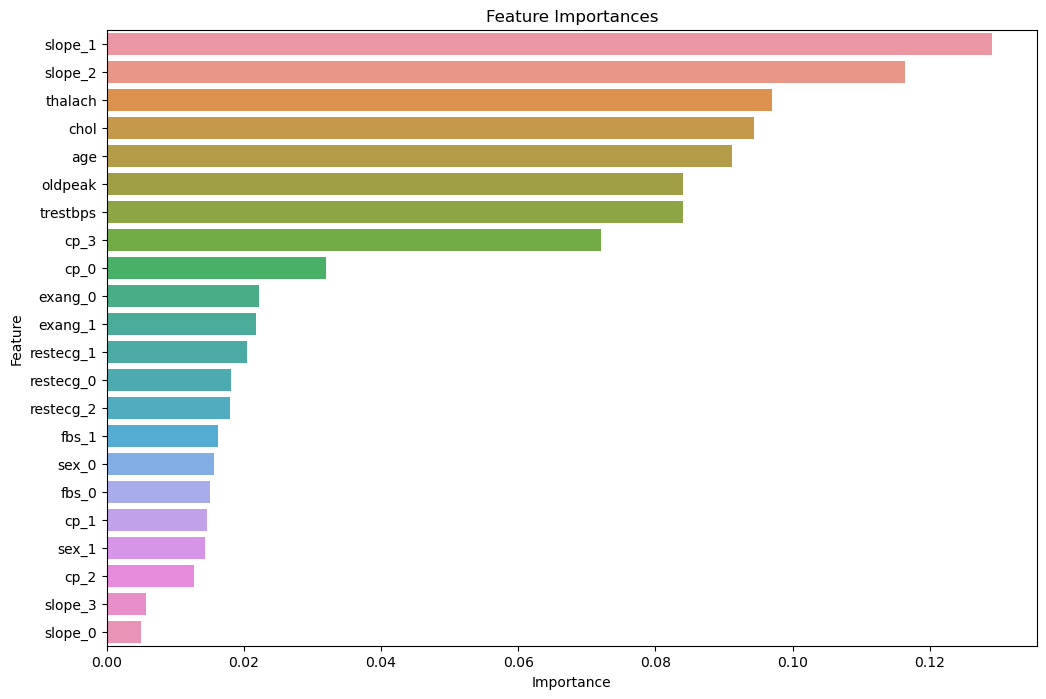

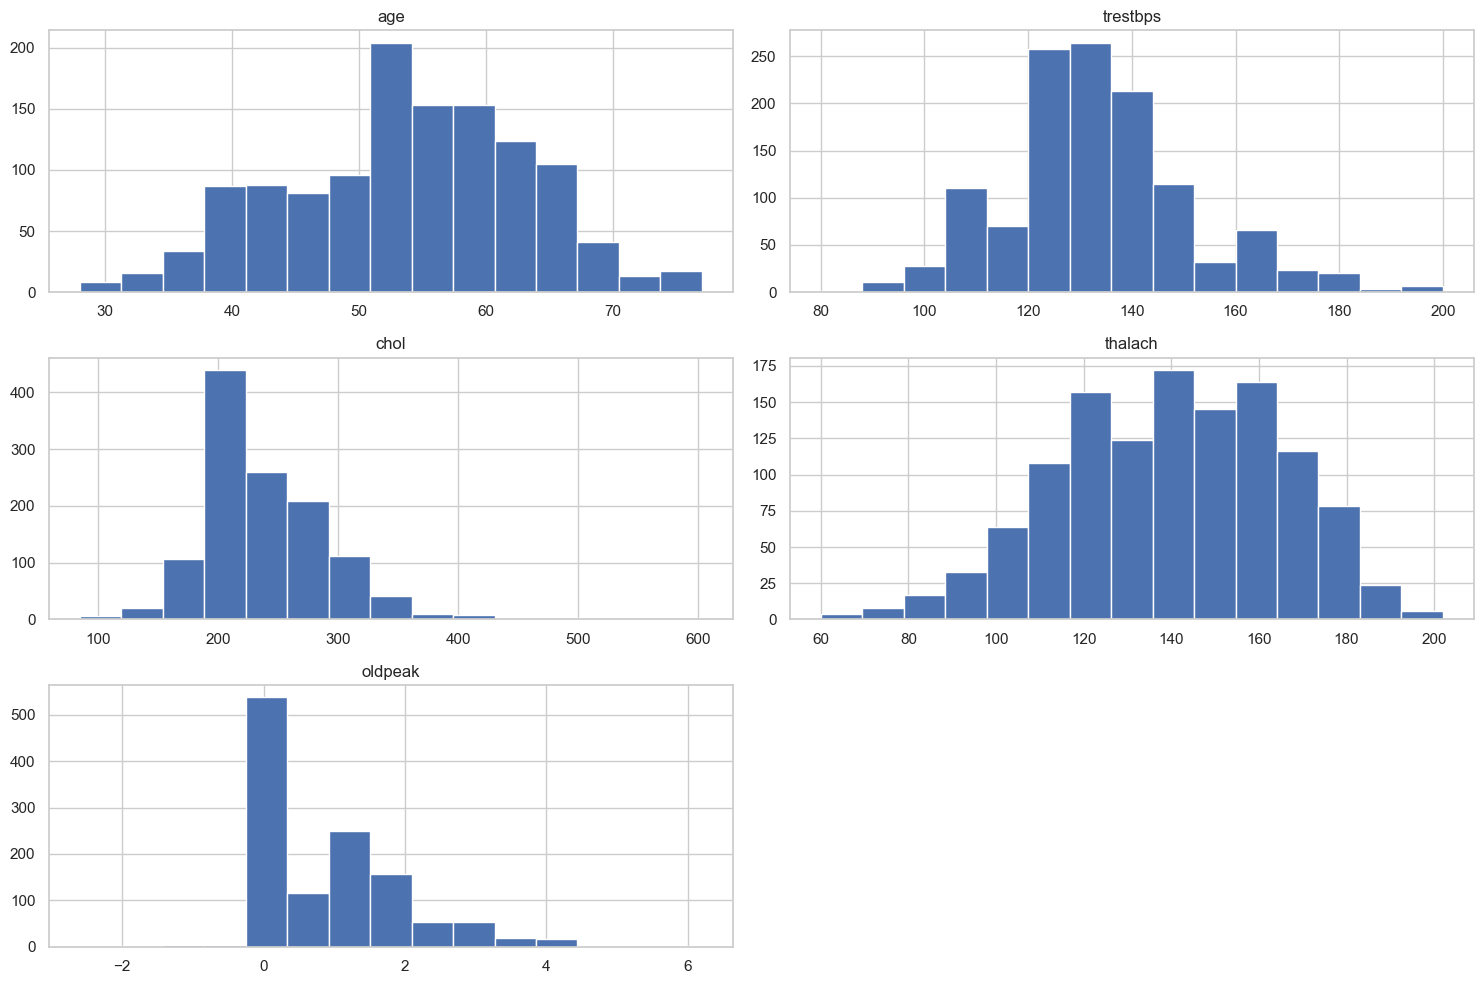

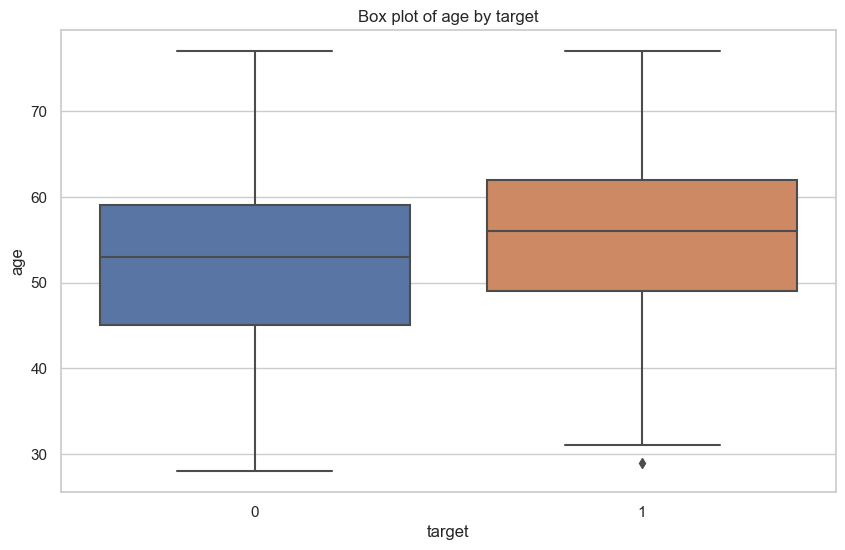

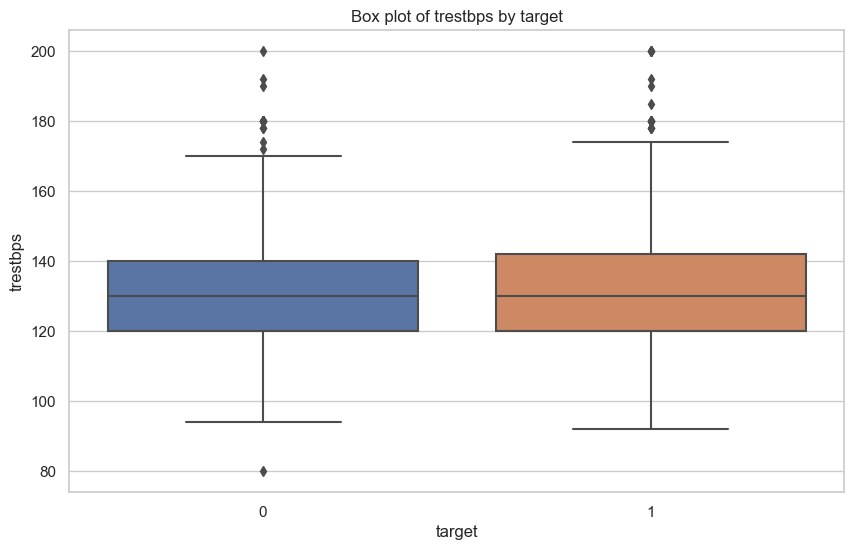

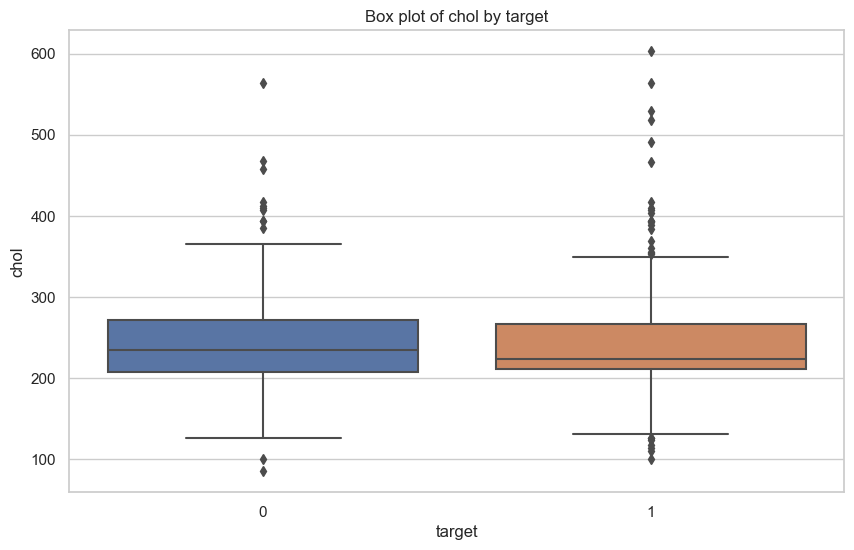

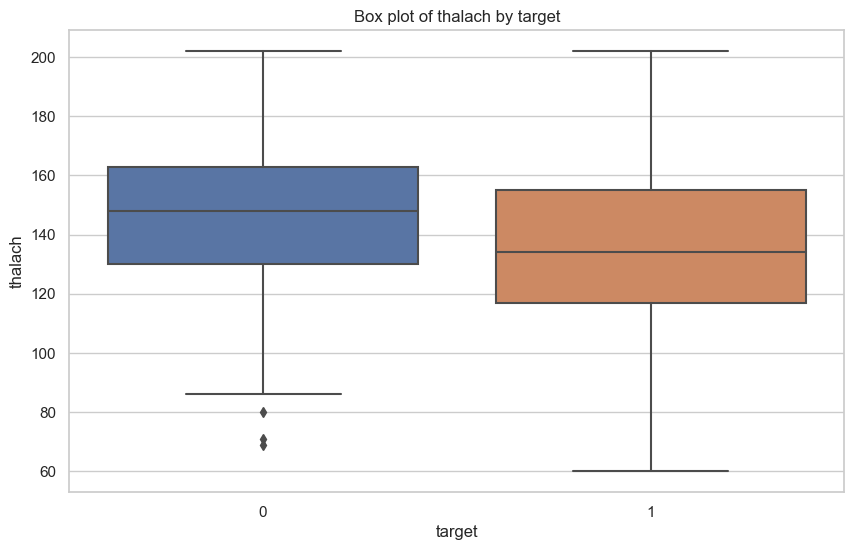

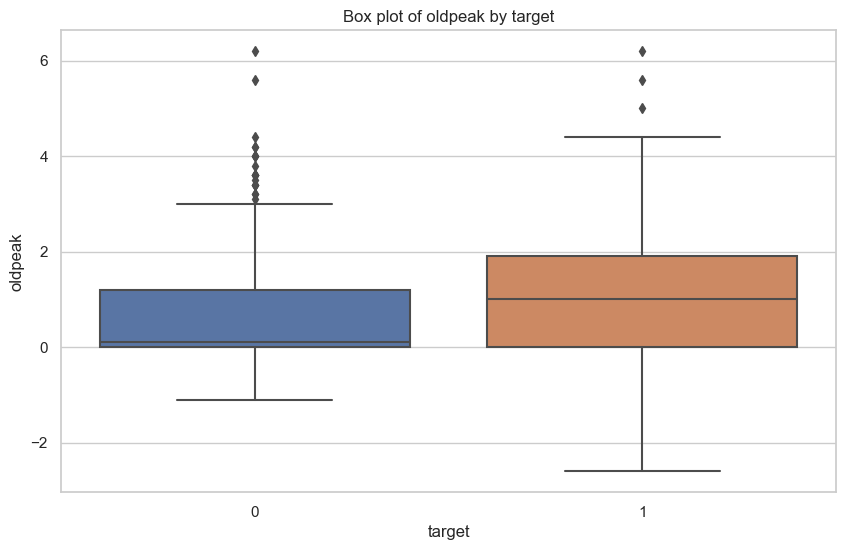

C:\Users\way2h\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


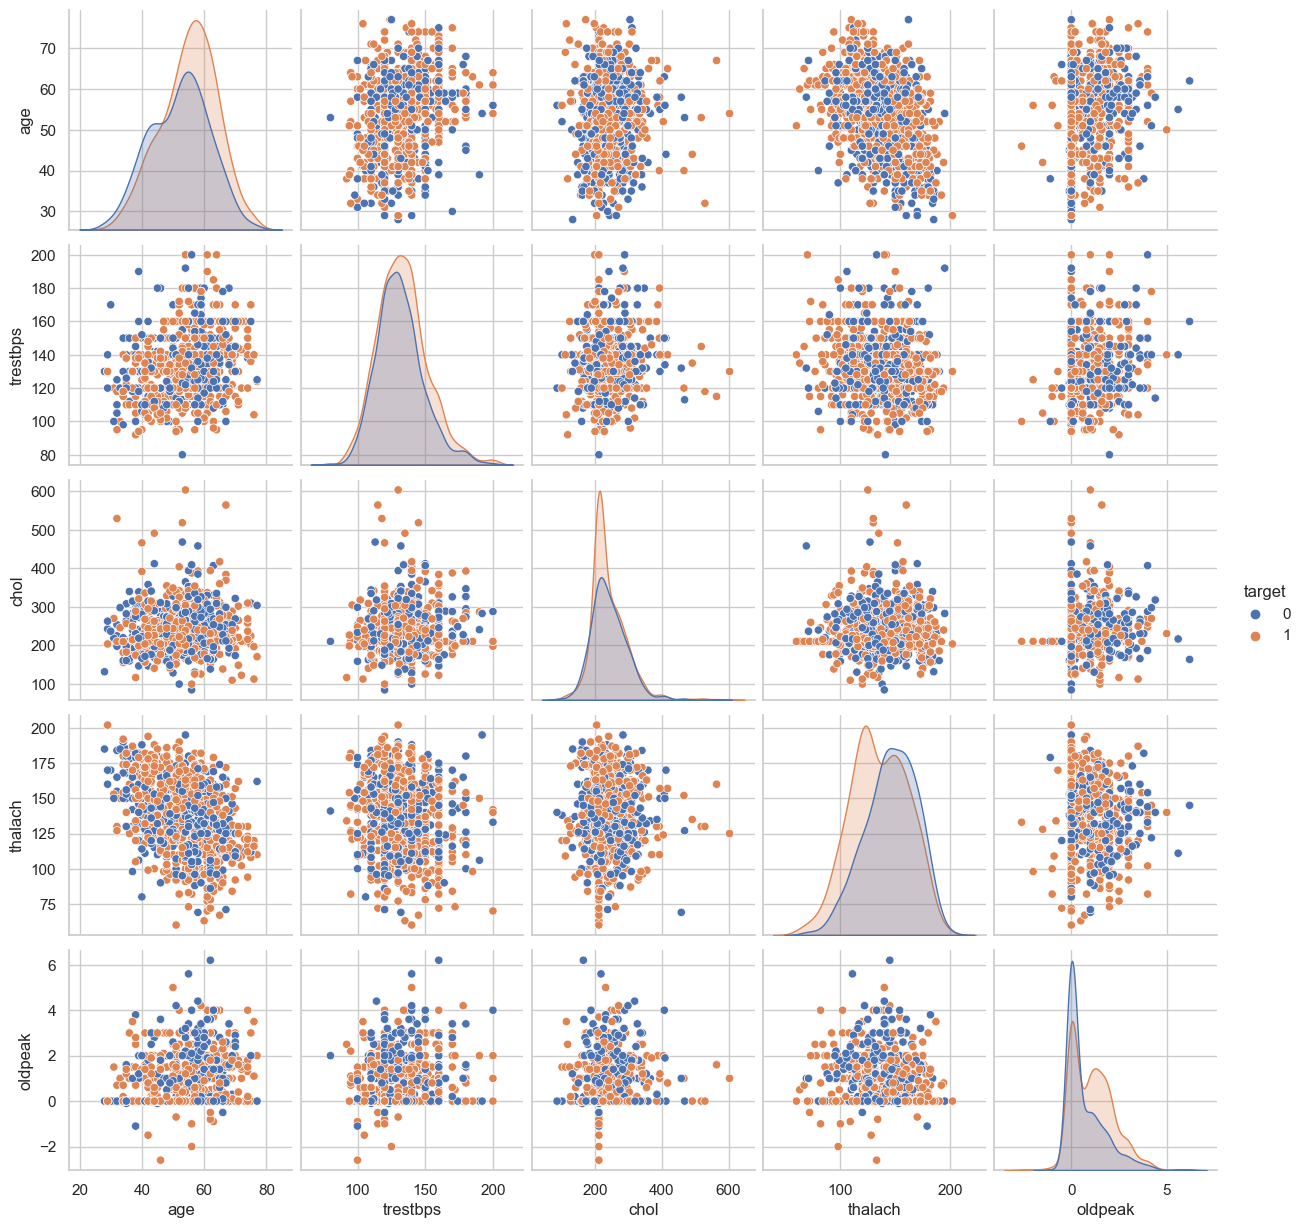

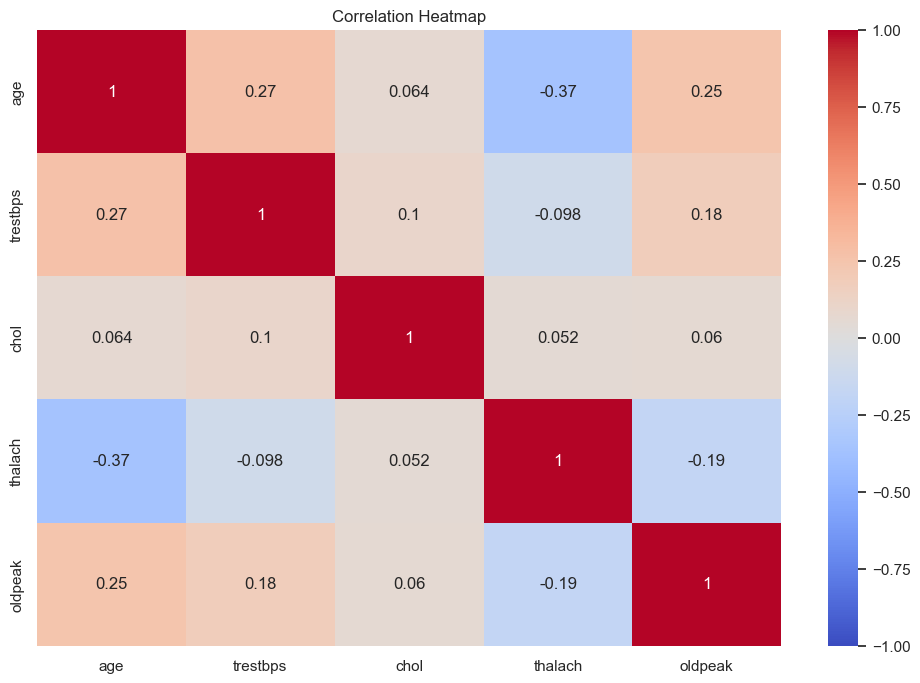

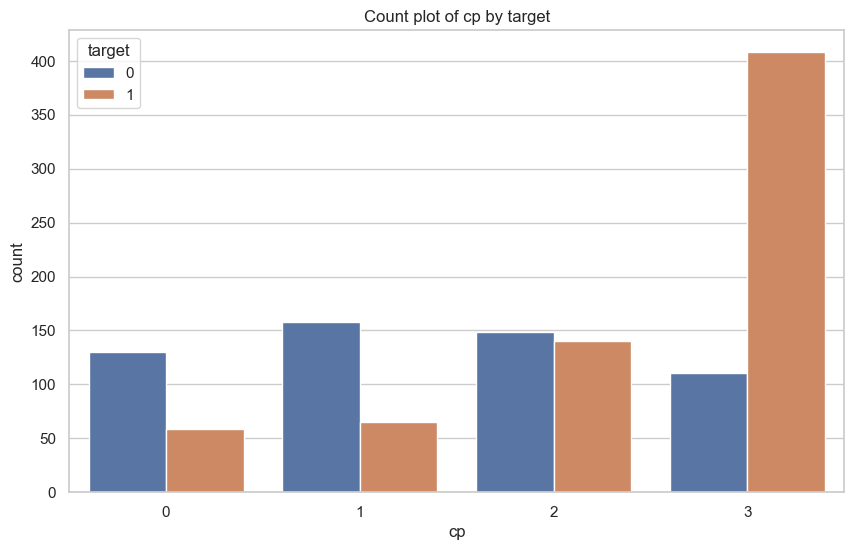

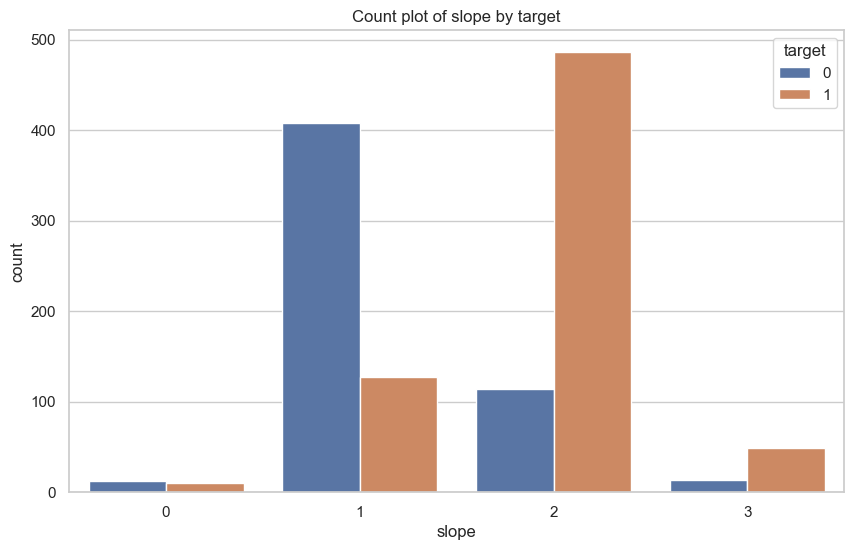

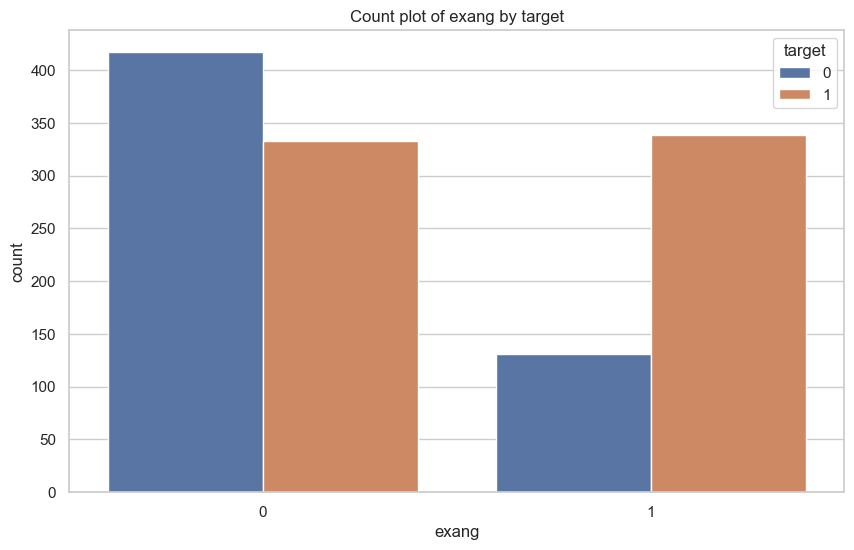

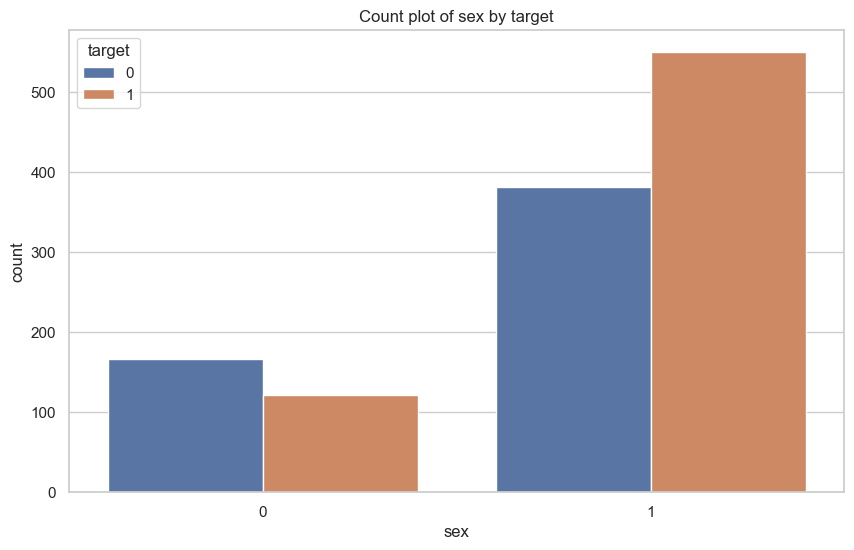

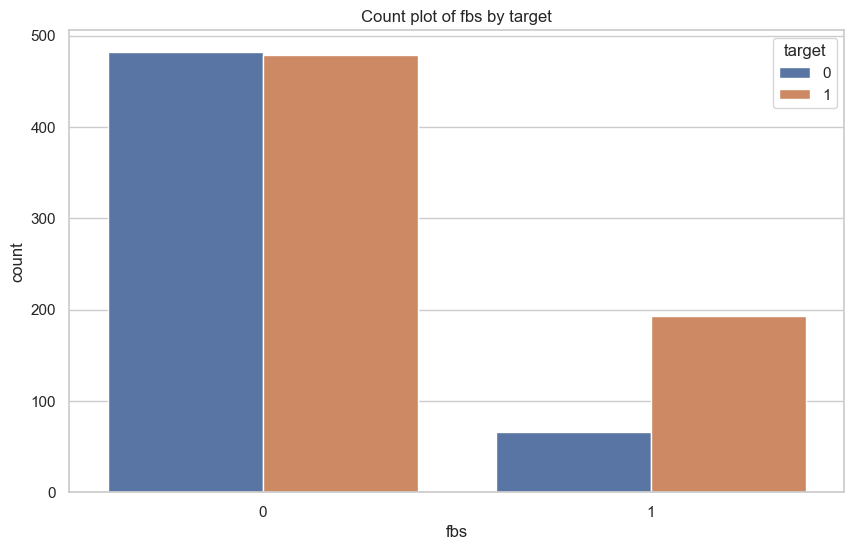

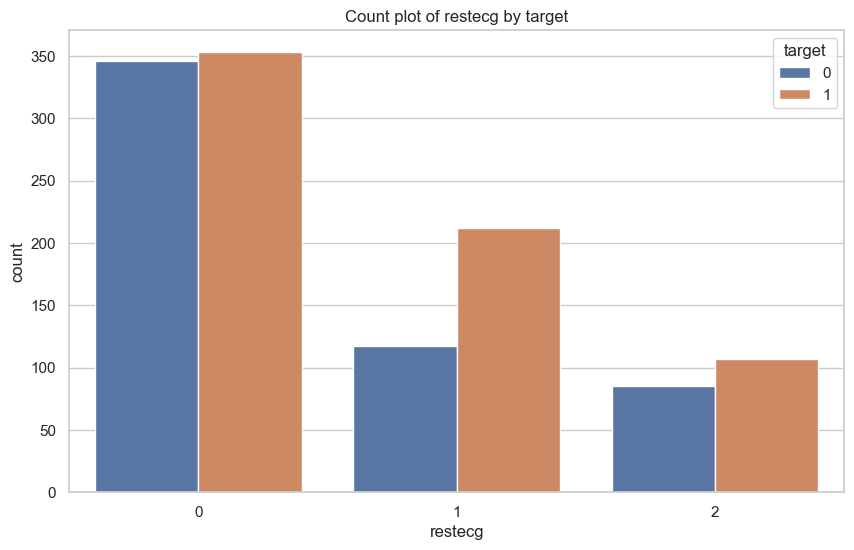

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sqlite3

# Load the combined dataset

combined_df = data

# Selected features based on importance
important_features = [
    'age', 'trestbps', 'chol', 'thalach', 'oldpeak',
    'cp', 'slope', 'exang', 'sex', 'fbs', 'restecg', 'target'
]

# Filter the dataframe to include only important features
filtered_df = combined_df[important_features]

# Split the data into features and target variable
X = filtered_df.drop(columns=['target'])
y = filtered_df['target']

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['cp', 'slope', 'exang', 'sex', 'fbs', 'restecg'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Calculate feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Function to plot feature importances
def plot_feature_importances(importances, feature_names):
    feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
    plt.title('Feature Importances')
    plt.show()

# Plot the feature importances
plot_feature_importances(importances, feature_names)



# Selected features based on importance
important_features = [
    'age', 'trestbps', 'chol', 'thalach', 'oldpeak',
    'cp', 'slope', 'exang', 'sex', 'fbs', 'restecg', 'target'
]

# Filter the dataframe to include only important features
filtered_df = combined_df[important_features]

# Set the style of seaborn
sns.set(style="whitegrid")

# 1. Histograms for Numeric Features
def plot_histograms(df, features):
    df[features].hist(bins=15, figsize=(15, 10), layout=(3, 2))
    plt.tight_layout()
    plt.show()

numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plot_histograms(filtered_df, numeric_features)

# 2. Box Plots for Numeric Features
def plot_boxplots(df, features, target):
    for feature in features:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=target, y=feature, data=df)
        plt.title(f'Box plot of {feature} by {target}')
        plt.show()

plot_boxplots(filtered_df, numeric_features, 'target')

# 3. Scatter Plots for Pairs of Numeric Features
def plot_scatter_matrix(df, features, target):
    sns.pairplot(df[features + [target]], hue=target, diag_kind='kde')
    plt.show()

plot_scatter_matrix(filtered_df, numeric_features, 'target')

# 4. Correlation Heatmap
def plot_correlation_heatmap(df, features):
    corr = df[features].corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap')
    plt.show()

plot_correlation_heatmap(filtered_df, numeric_features)

# 5. Count Plot for Categorical Features
def plot_countplots(df, features, target):
    for feature in features:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=feature, hue=target, data=df)
        plt.title(f'Count plot of {feature} by {target}')
        plt.show()

categorical_features = ['cp', 'slope', 'exang', 'sex', 'fbs', 'restecg']
plot_countplots(filtered_df, categorical_features, 'target')



In [8]:
import sqlite3
import pandas as pd

# Load your heart disease dataset
heart_disease_data = data

# Connect to the SQLite database
conn = sqlite3.connect('heart_disease.db')
cursor = conn.cursor()

# Create tables
cursor.execute('''CREATE TABLE IF NOT EXISTS patients (
                    id INTEGER PRIMARY KEY,
                    age INTEGER,
                    sex INTEGER,
                    cp INTEGER,
                    trestbps INTEGER,
                    chol INTEGER,
                    fbs INTEGER,
                    restecg INTEGER,
                    thalach INTEGER,
                    exang INTEGER,
                    oldpeak REAL,
                    slope INTEGER,
                    target INTEGER
                )''')

# Insert data into the patients table
for _, row in heart_disease_data.iterrows():
    cursor.execute('''INSERT INTO patients 
                        (age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, target) 
                        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)''',
                    (row['age'], row['sex'], row['cp'], row['trestbps'], row['chol'],
                     row['fbs'], row['restecg'], row['thalach'], row['exang'], row['oldpeak'],
                     row['slope'], row['target']))

# Commit changes and close connection
conn.commit()
conn.close()



In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
import joblib


# Combine the datasets
combined_data = data

# Preprocess the data
def preprocess_data(df):
    # Step 1: Handle missing values
    df = df.dropna()

    # Step 2: Adjust 'cp' (Chest Pain Type) by decrementing all values by 1
    
    
    # Step 3: Address unrealistic values
    # Replace zeros in 'chol' with the mean of the column
    

    # Step 4: Feature Scaling
    scaler = StandardScaler()
    numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
    df[numerical_features] = scaler.fit_transform(df[numerical_features])

    # Step 5: Encoding categorical variables
    categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope']
    label_encoders = {}
    for feature in categorical_features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
        label_encoders[feature] = le

    return df, scaler, label_encoders




combined_data, scaler, label_encoders = preprocess_data(combined_data)

# Split data into features and target
X = combined_data.drop('target', axis=1)
y = combined_data['target']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
joblib.dump(X_train,'X_train.pkl')
joblib.dump(y_train,'y_train.pkl')

# Hyperparameters for GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Random Forest model
rf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
rf_cv.fit(X_train, y_train)
best_rf = rf_cv.best_estimator_

# XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_cv = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy')
xgb_cv.fit(X_train, y_train)
best_xgb = xgb_cv.best_estimator_

# Ensemble model using VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[('rf', best_rf), ('xgb', best_xgb)],
    voting='soft'
)
ensemble_model.fit(X_train, y_train)

# Evaluate the ensemble model
y_pred = ensemble_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Model Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Save the models
joblib.dump(best_rf, 'best_rf_model.pkl')
joblib.dump(best_xgb, 'best_xgb_model.pkl')
joblib.dump(ensemble_model, 'ensemble_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')




Ensemble Model Accuracy: 0.8114754098360656
              precision    recall  f1-score   support

           0       0.82      0.70      0.76       101
           1       0.81      0.89      0.85       143

    accuracy                           0.81       244
   macro avg       0.81      0.80      0.80       244
weighted avg       0.81      0.81      0.81       244



['label_encoders.pkl']

In [11]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000
mean,53.736066,0.763115,1.932787,132.308361,240.299565,0.212295,0.584426,139.968033,0.385246,0.925902,1.577049,0.550820
std,9.343461,0.425346,1.106506,17.882720,54.270755,0.409100,0.747050,25.446332,0.486853,1.092409,0.619453,0.497615
min,28.000000,0.000000,0.000000,80.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,1.000000,120.000000,210.607377,0.000000,0.000000,122.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,2.000000,130.000000,228.000000,0.000000,0.000000,141.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,3.000000,140.000000,269.000000,0.000000,1.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000
